# Implementation of Vanilla GANs model
Reference: https://arxiv.org/pdf/1406.2661.pdf

In [1]:
# Run the comment below only when using Google Colab
# !pip install torch torchvision

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image

In [4]:
import numpy as np
import datetime
import os, sys

In [5]:
from matplotlib.pyplot import imshow, imsave, show
%matplotlib inline

In [6]:
MODEL_NAME = 'VanillaGAN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
def get_sample_image(G, n_noise):
    """
        save sample 100 images
    """
    z = torch.randn(100, n_noise).to(DEVICE)
    y_hat = G(z).view(100, 28, 28) # (100, 28, 28)
    result = y_hat.cpu().data.numpy()
    img = np.zeros([280, 280])
    for j in range(10):
        img[j*28:(j+1)*28] = np.concatenate([x for x in result[j*10:(j+1)*10]], axis=-1)
    return img

In [8]:
class Discriminator(nn.Module):
    """
        Simple Discriminator w/ MLP
    """
    def __init__(self, input_size=784, num_classes=1):
        super(Discriminator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, num_classes),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        y_ = x.view(x.size(0), -1)
        y_ = self.layer(y_)
        return y_

In [9]:
class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size=128, num_classes=784):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, num_classes),
            nn.Tanh()
        )
        
    def forward(self, x):
        y_ = self.layer(x)
        y_ = y_.view(x.size(0), 1, 28, 28)
        return y_

In [10]:
n_noise = 100

In [11]:
D = Discriminator().to(DEVICE)
G = Generator(n_noise).to(DEVICE)

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],
                                std=[0.5])]
)

In [13]:
mnist = datasets.MNIST(root='../data/', train=True, transform=transform, download=True)

In [14]:
batch_size = 64

In [15]:
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [16]:
criterion = nn.BCELoss()
D_opt = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_opt = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [17]:
max_epoch = 50 # need more than 10 epochs for training generator
step = 0
n_critic = 1 # for training more k steps about Discriminator

In [18]:
D_labels = torch.ones(batch_size, 1).to(DEVICE) # Discriminator Label to real
D_fakes = torch.zeros(batch_size, 1).to(DEVICE) # Discriminator Label to fake

In [19]:
if not os.path.exists('samples'):
    os.makedirs('samples')

Epoch: 0/50, Step: 0, D Loss: 1.3675918579101562, G Loss: 0.6945605874061584


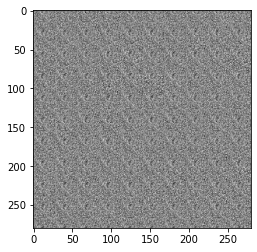

Epoch: 0/50, Step: 500, D Loss: 1.303032398223877, G Loss: 1.0100057125091553
Epoch: 1/50, Step: 1000, D Loss: 1.1862046718597412, G Loss: 0.8138200640678406


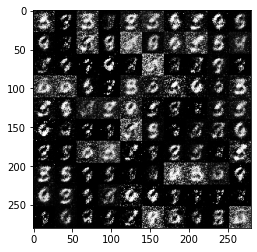

Epoch: 1/50, Step: 1500, D Loss: 1.1541768312454224, G Loss: 0.950950562953949
Epoch: 2/50, Step: 2000, D Loss: 1.3227567672729492, G Loss: 0.4882378578186035


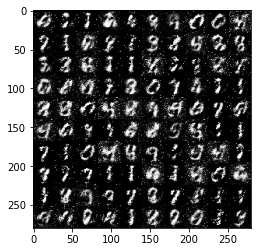

Epoch: 2/50, Step: 2500, D Loss: 1.1802657842636108, G Loss: 0.6746989488601685
Epoch: 3/50, Step: 3000, D Loss: 1.2902401685714722, G Loss: 1.5263280868530273


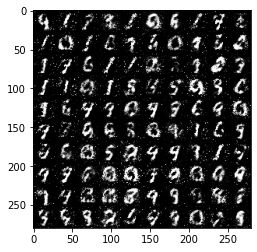

Epoch: 3/50, Step: 3500, D Loss: 1.1006081104278564, G Loss: 0.7603307962417603
Epoch: 4/50, Step: 4000, D Loss: 1.2701528072357178, G Loss: 0.9755332469940186


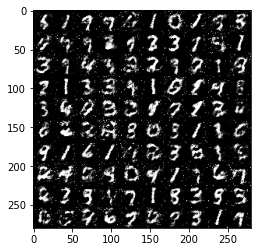

Epoch: 4/50, Step: 4500, D Loss: 1.2602591514587402, G Loss: 1.3861937522888184
Epoch: 5/50, Step: 5000, D Loss: 1.1914079189300537, G Loss: 0.7940388321876526


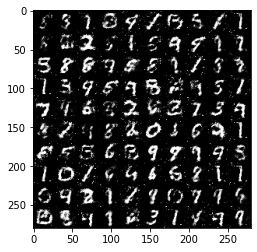

Epoch: 5/50, Step: 5500, D Loss: 1.1661131381988525, G Loss: 0.8794649839401245
Epoch: 6/50, Step: 6000, D Loss: 1.2897272109985352, G Loss: 0.8221184015274048


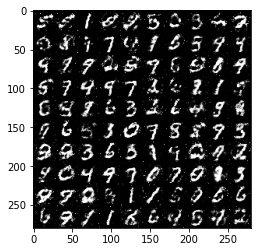

Epoch: 6/50, Step: 6500, D Loss: 1.2195801734924316, G Loss: 0.8914726972579956
Epoch: 7/50, Step: 7000, D Loss: 1.254212737083435, G Loss: 0.7470211386680603


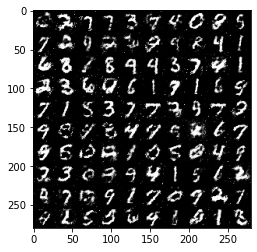

Epoch: 8/50, Step: 7500, D Loss: 1.261972188949585, G Loss: 0.8276642560958862
Epoch: 8/50, Step: 8000, D Loss: 1.2887489795684814, G Loss: 0.8231174945831299


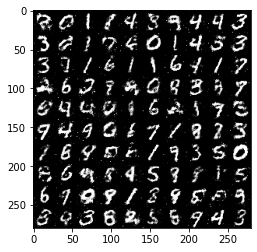

Epoch: 9/50, Step: 8500, D Loss: 1.286339282989502, G Loss: 0.9513591527938843
Epoch: 9/50, Step: 9000, D Loss: 1.2306041717529297, G Loss: 0.9622734785079956


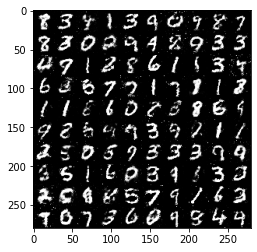

Epoch: 10/50, Step: 9500, D Loss: 1.2614805698394775, G Loss: 0.7815321087837219
Epoch: 10/50, Step: 10000, D Loss: 1.3008265495300293, G Loss: 0.6793850064277649


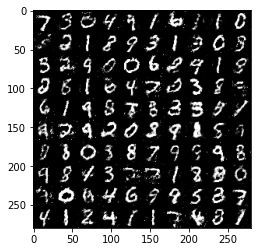

Epoch: 11/50, Step: 10500, D Loss: 1.2065136432647705, G Loss: 0.829704761505127
Epoch: 11/50, Step: 11000, D Loss: 1.3336293697357178, G Loss: 1.0026286840438843


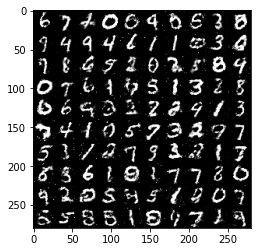

Epoch: 12/50, Step: 11500, D Loss: 1.2762091159820557, G Loss: 0.8131400346755981
Epoch: 12/50, Step: 12000, D Loss: 1.2871472835540771, G Loss: 0.8090887069702148


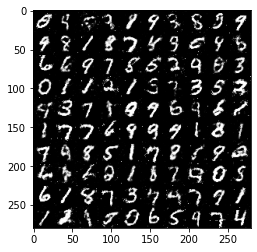

Epoch: 13/50, Step: 12500, D Loss: 1.2684922218322754, G Loss: 1.0386173725128174
Epoch: 13/50, Step: 13000, D Loss: 1.3084940910339355, G Loss: 0.6630535125732422


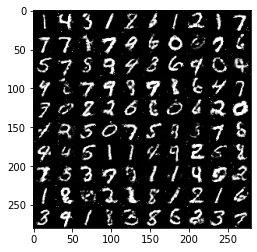

Epoch: 14/50, Step: 13500, D Loss: 1.2681069374084473, G Loss: 0.982200026512146
Epoch: 14/50, Step: 14000, D Loss: 1.239343523979187, G Loss: 0.7612175345420837


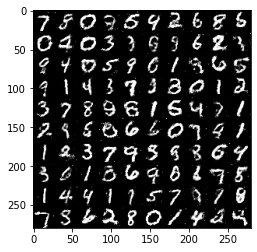

Epoch: 15/50, Step: 14500, D Loss: 1.2878894805908203, G Loss: 0.6534901857376099
Epoch: 16/50, Step: 15000, D Loss: 1.3045508861541748, G Loss: 0.7390287518501282


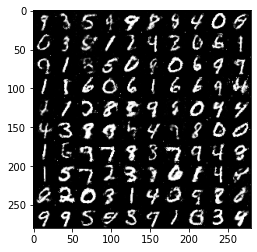

Epoch: 16/50, Step: 15500, D Loss: 1.318877100944519, G Loss: 0.8114052414894104
Epoch: 17/50, Step: 16000, D Loss: 1.1925075054168701, G Loss: 0.7458778619766235


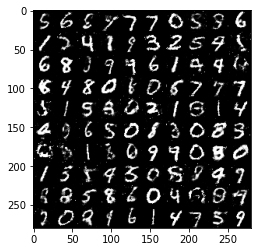

Epoch: 17/50, Step: 16500, D Loss: 1.3426398038864136, G Loss: 0.8809397220611572
Epoch: 18/50, Step: 17000, D Loss: 1.1914691925048828, G Loss: 1.0259466171264648


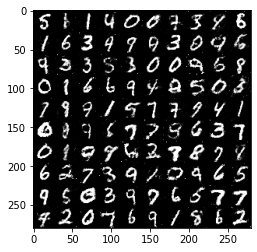

Epoch: 18/50, Step: 17500, D Loss: 1.3576927185058594, G Loss: 0.6633070707321167
Epoch: 19/50, Step: 18000, D Loss: 1.228413462638855, G Loss: 0.947344183921814


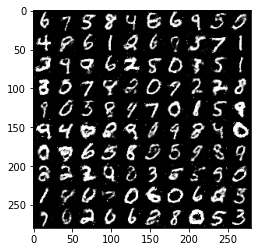

Epoch: 19/50, Step: 18500, D Loss: 1.3772059679031372, G Loss: 0.580107569694519
Epoch: 20/50, Step: 19000, D Loss: 1.2752799987792969, G Loss: 0.7739121913909912


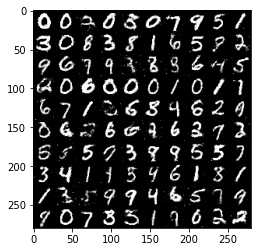

Epoch: 20/50, Step: 19500, D Loss: 1.4215160608291626, G Loss: 1.1748740673065186
Epoch: 21/50, Step: 20000, D Loss: 1.214669108390808, G Loss: 0.8791306614875793


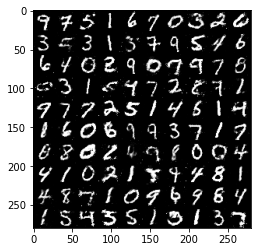

Epoch: 21/50, Step: 20500, D Loss: 1.3201203346252441, G Loss: 0.7308412790298462
Epoch: 22/50, Step: 21000, D Loss: 1.2646045684814453, G Loss: 0.8981389999389648


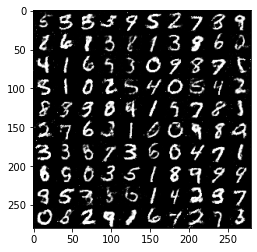

Epoch: 22/50, Step: 21500, D Loss: 1.3591846227645874, G Loss: 1.0086737871170044
Epoch: 23/50, Step: 22000, D Loss: 1.3707716464996338, G Loss: 0.9402686357498169


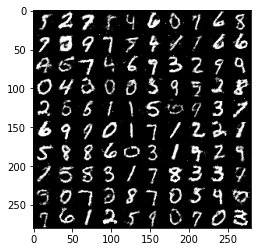

Epoch: 24/50, Step: 22500, D Loss: 1.3489735126495361, G Loss: 0.5860767364501953
Epoch: 24/50, Step: 23000, D Loss: 1.2974218130111694, G Loss: 0.8264709711074829


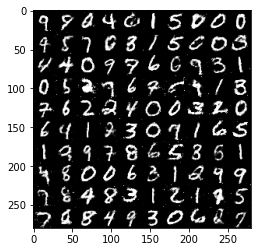

Epoch: 25/50, Step: 23500, D Loss: 1.2779958248138428, G Loss: 0.8049495816230774
Epoch: 25/50, Step: 24000, D Loss: 1.3519699573516846, G Loss: 0.8817715644836426


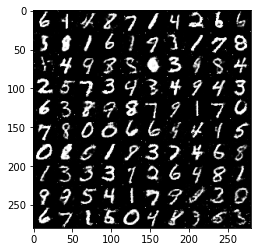

KeyboardInterrupt: ignored

In [20]:
for epoch in range(max_epoch):
    for idx, (images, _) in enumerate(data_loader):
        # Training Discriminator
        x = images.to(DEVICE)
        x_outputs = D(x)
        D_x_loss = criterion(x_outputs, D_labels)

        z = torch.randn(batch_size, n_noise).to(DEVICE)
        z_outputs = D(G(z))
        D_z_loss = criterion(z_outputs, D_fakes)
        D_loss = D_x_loss + D_z_loss
        
        D.zero_grad()
        D_loss.backward()
        D_opt.step()

        if step % n_critic == 0:
            # Training Generator
            z = torch.randn(batch_size, n_noise).to(DEVICE)
            z_outputs = D(G(z))
            G_loss = criterion(z_outputs, D_labels)

            G.zero_grad()
            G_loss.backward()
            G_opt.step()
        
        if step % 500 == 0:
            print('Epoch: {}/{}, Step: {}, D Loss: {}, G Loss: {}'.format(epoch, max_epoch, step, D_loss.item(), G_loss.item()))
        
        if step % 1000 == 0:
            G.eval()
            img = get_sample_image(G, n_noise)
            imshow(get_sample_image(G, n_noise), cmap='gray')
            show()
            G.train()
        step += 1

## Visualize Sample

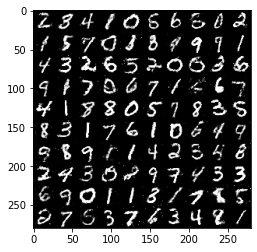

In [21]:
# generation to image
G.eval()
imshow(get_sample_image(G, n_noise), cmap='gray')

In [ ]:
# Saving params.
torch.save(D.state_dict(), 'D.pkl')
torch.save(G.state_dict(), 'G.pkl')